In [1]:
import cv2
import numpy as np
from scipy.signal import butter
from scipy import signal
from tqdm import tqdm
from scipy import stats as st
import os
import pandas as pd

from FeatureProcessingBHrPPG.main import *
from FeatureProcessing import roi
import matplotlib.pyplot as plt

import pickle as pk

In [2]:
rootDir = "D:\\D-Download\\Pub_BH-rPPG_FULL\\Pub_BH-rPPG_FULL\\"
videos = os.listdir(rootDir)

videosLow = []
videosMedium = []
videosHigh = []

for video in videos:
    if(video[-1] == '0'):
        videosLow.append(video)
    elif(video[-1] == '1'):
        videosMedium.append(video)
    elif(video[-1] == '2'):
        videosHigh.append(video)

print(
    len(videosLow),
    len(videosMedium),
    len(videosHigh)
)

35 35 35


In [3]:
i = 0

video = VideoFeature(rootDir + videosLow[i], videosLow[i], roi.getROI, maxObjects=MAX_OBJECTS)

video.readVideo()
clrs = video.getColors(0)

1800
Reading video.. D:\D-Download\Pub_BH-rPPG_FULL\Pub_BH-rPPG_FULL\0_0\0_0


100%|██████████| 900/900 [02:12<00:00,  6.78it/s]


(900,) (900,) (900,) (900,)


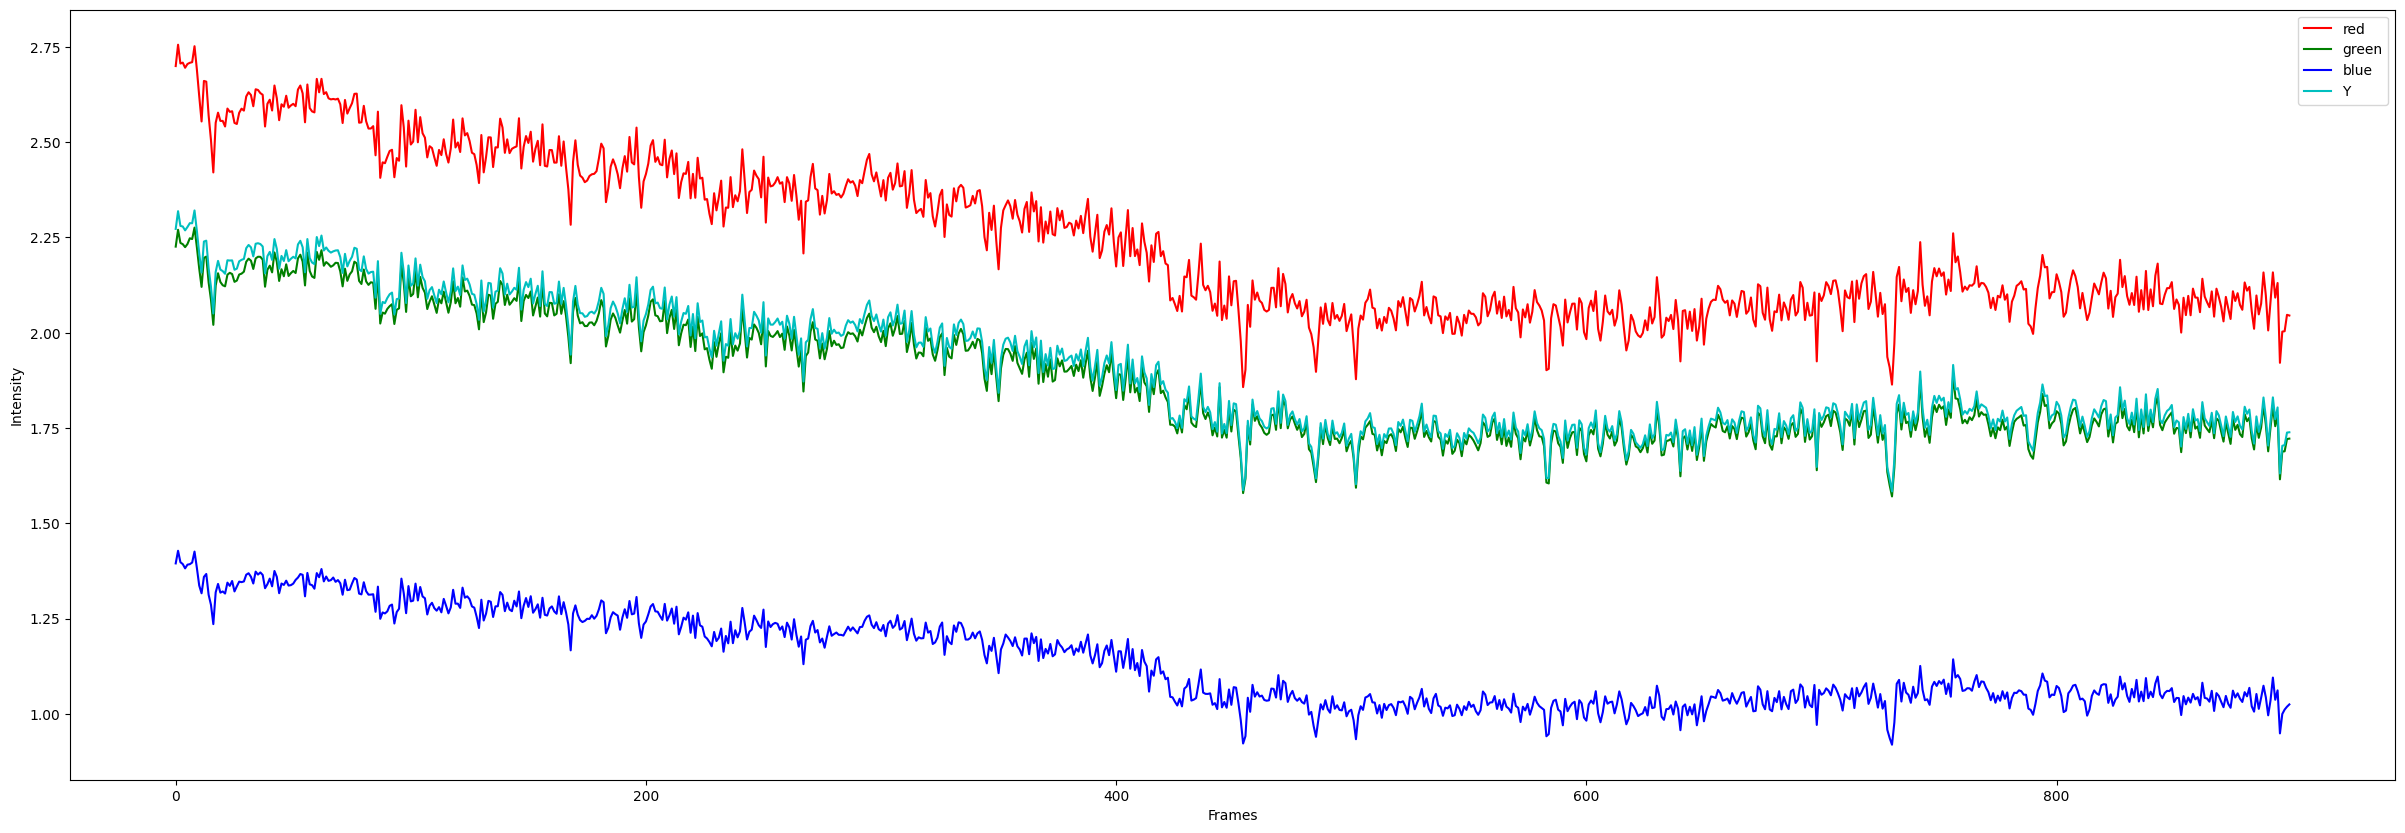

In [23]:
colors = video.getTotolColorTrack()
colors.keys()

plt.figure(figsize=(30, 10))
plt.plot(colors['red'], color = 'r', label='red')
plt.plot(colors['green'], color = 'g', label="green")
plt.plot(colors['blue'], color = 'b', label="blue")
plt.plot(colors['y'], color = 'c', label='Y')

plt.xlabel("Frames")
plt.ylabel("Intensity")

plt.legend()

r, g, b, y = np.array(colors['red']), np.array(colors['green']), np.array(colors['blue']), np.array(colors['y'])

print(r.shape, g.shape, b.shape, y.shape)


In [5]:
chromProvider = ChormFeatures(video)
chromData = chromProvider.provideFeatureBuild(r, g, b, y)

def normalize_1d_array(array):
    # Perform Min-Max normalization

    # Get the minimum and maximum values of the array
    min_val = np.min(array)
    max_val = np.max(array)

    # If all values are the same, return a zeroed array to avoid division by zero
    if min_val == max_val:
        return np.zeros_like(array)

    # Normalize to the range [0, 1]
    normalized = (array - min_val) / (max_val - min_val)

    return normalized



In [6]:
def __ButterBandpass(lowcut, highcut):
        nyq = 0.5 * 30
        low = lowcut / nyq
        high = highcut / nyq
        b, a = butter(2, [low, high], btype='band')
        return b, a

def butterBandpassFilter(data, lowcut, highcut):
    b, a = __ButterBandpass(lowcut, highcut)
    y = signal.filtfilt(b, a, data)
    return y

r_bp = butterBandpassFilter(r, 0.7, 5)
g_bp = butterBandpassFilter(g, 0.7, 5)
b_bp = butterBandpassFilter(b, 0.7, 5)
y_bp = butterBandpassFilter(y, 0.7, 5)


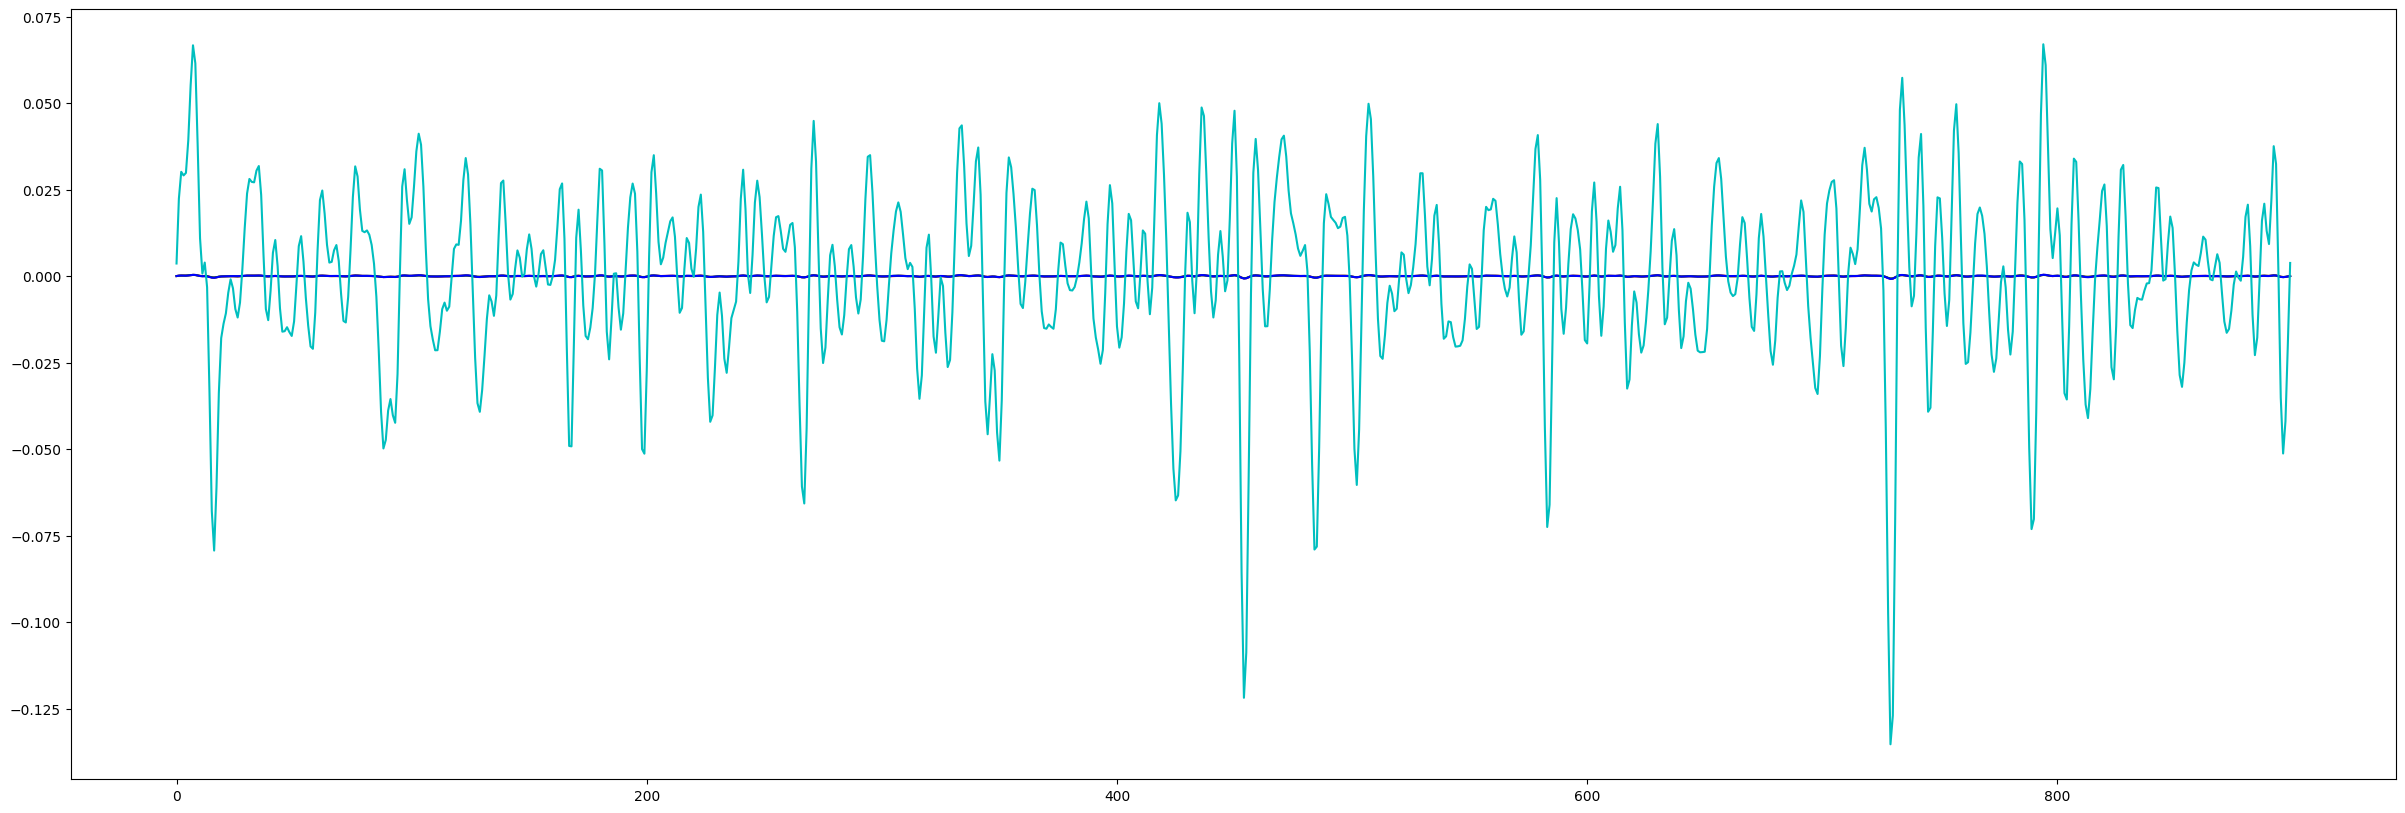

In [7]:
plt.figure(figsize=(30, 10))

plt.plot(r_bp, color = 'r')
plt.plot(g_bp, color = 'g')
plt.plot(b_bp, color = 'b')
plt.plot(y_bp, color = 'c')


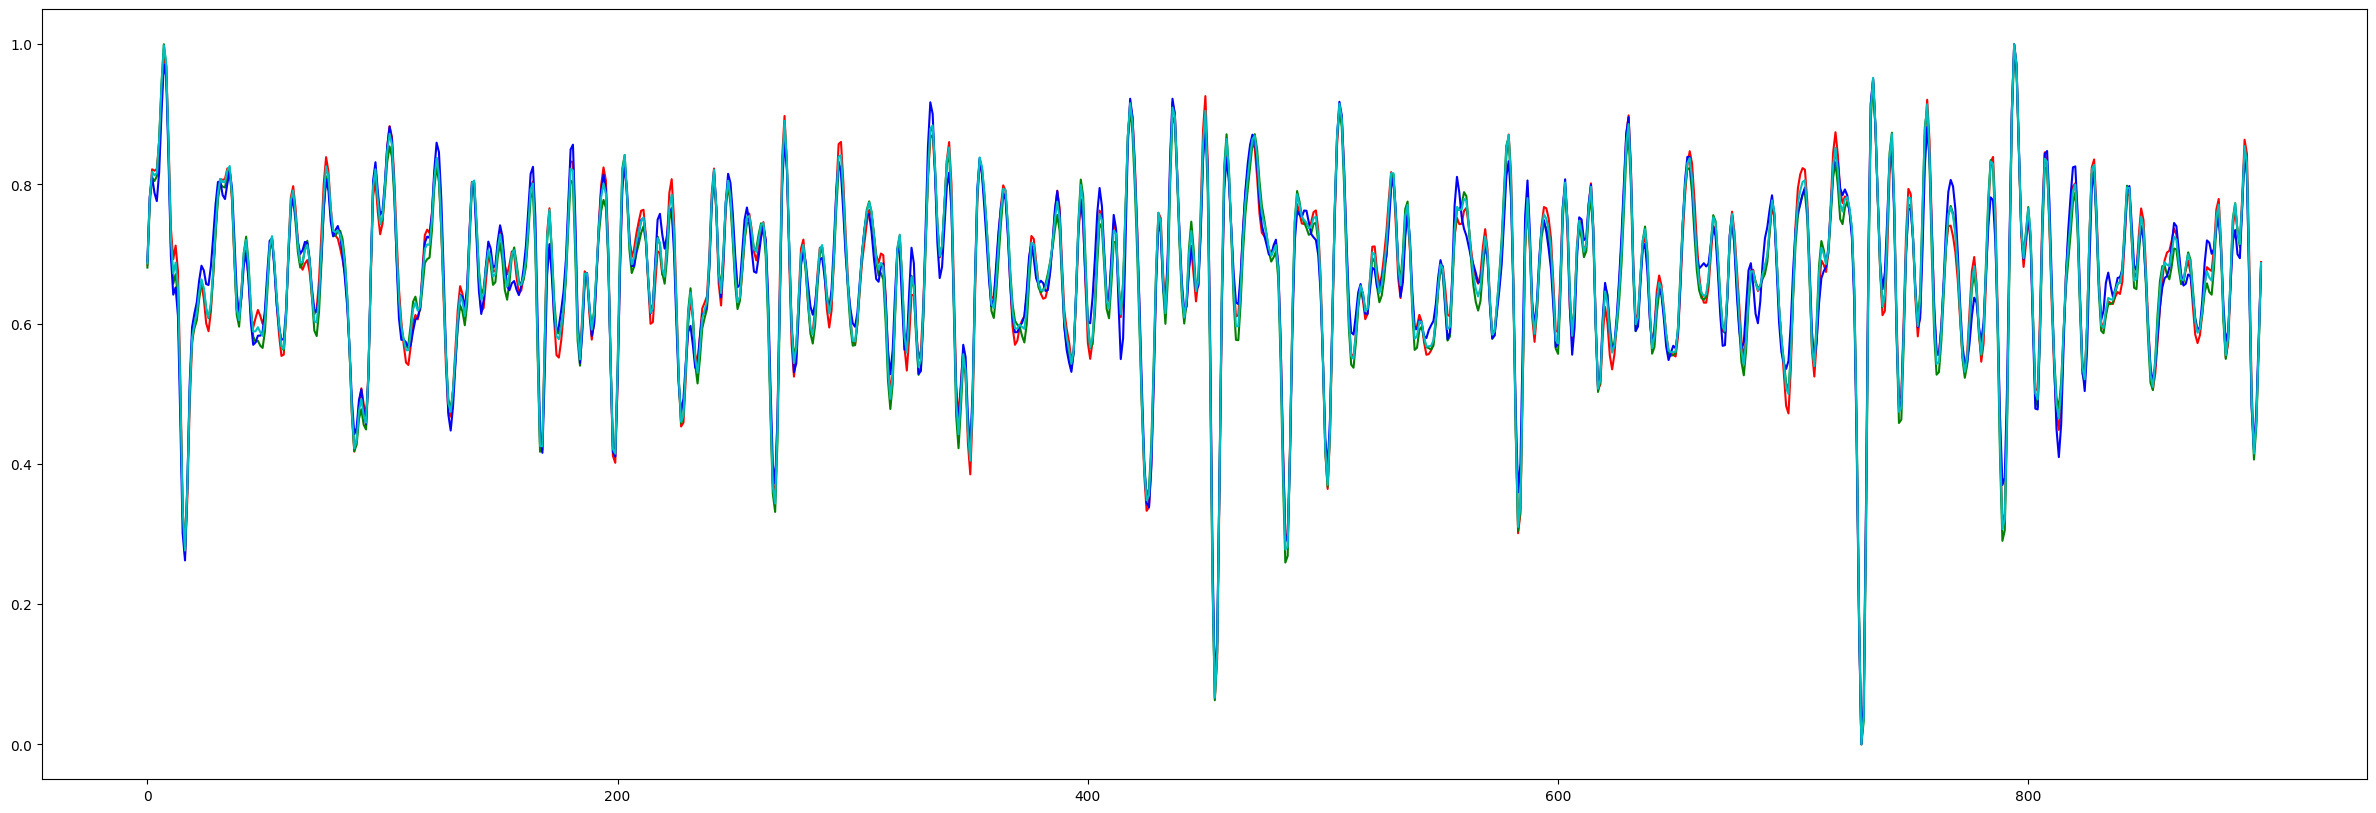

In [8]:
plt.figure(figsize=(30, 10))

r_norm = normalize_1d_array(r_bp)
g_norm = normalize_1d_array(g_bp)
b_norm = normalize_1d_array(b_bp)
y_norm = normalize_1d_array(y_bp)

plt.plot(r_norm, color = 'r')
plt.plot(g_norm, color = 'g')
plt.plot(b_norm, color = 'b')
plt.plot(y_norm, color = 'c')

Text(0, 0.5, 'Intensity')

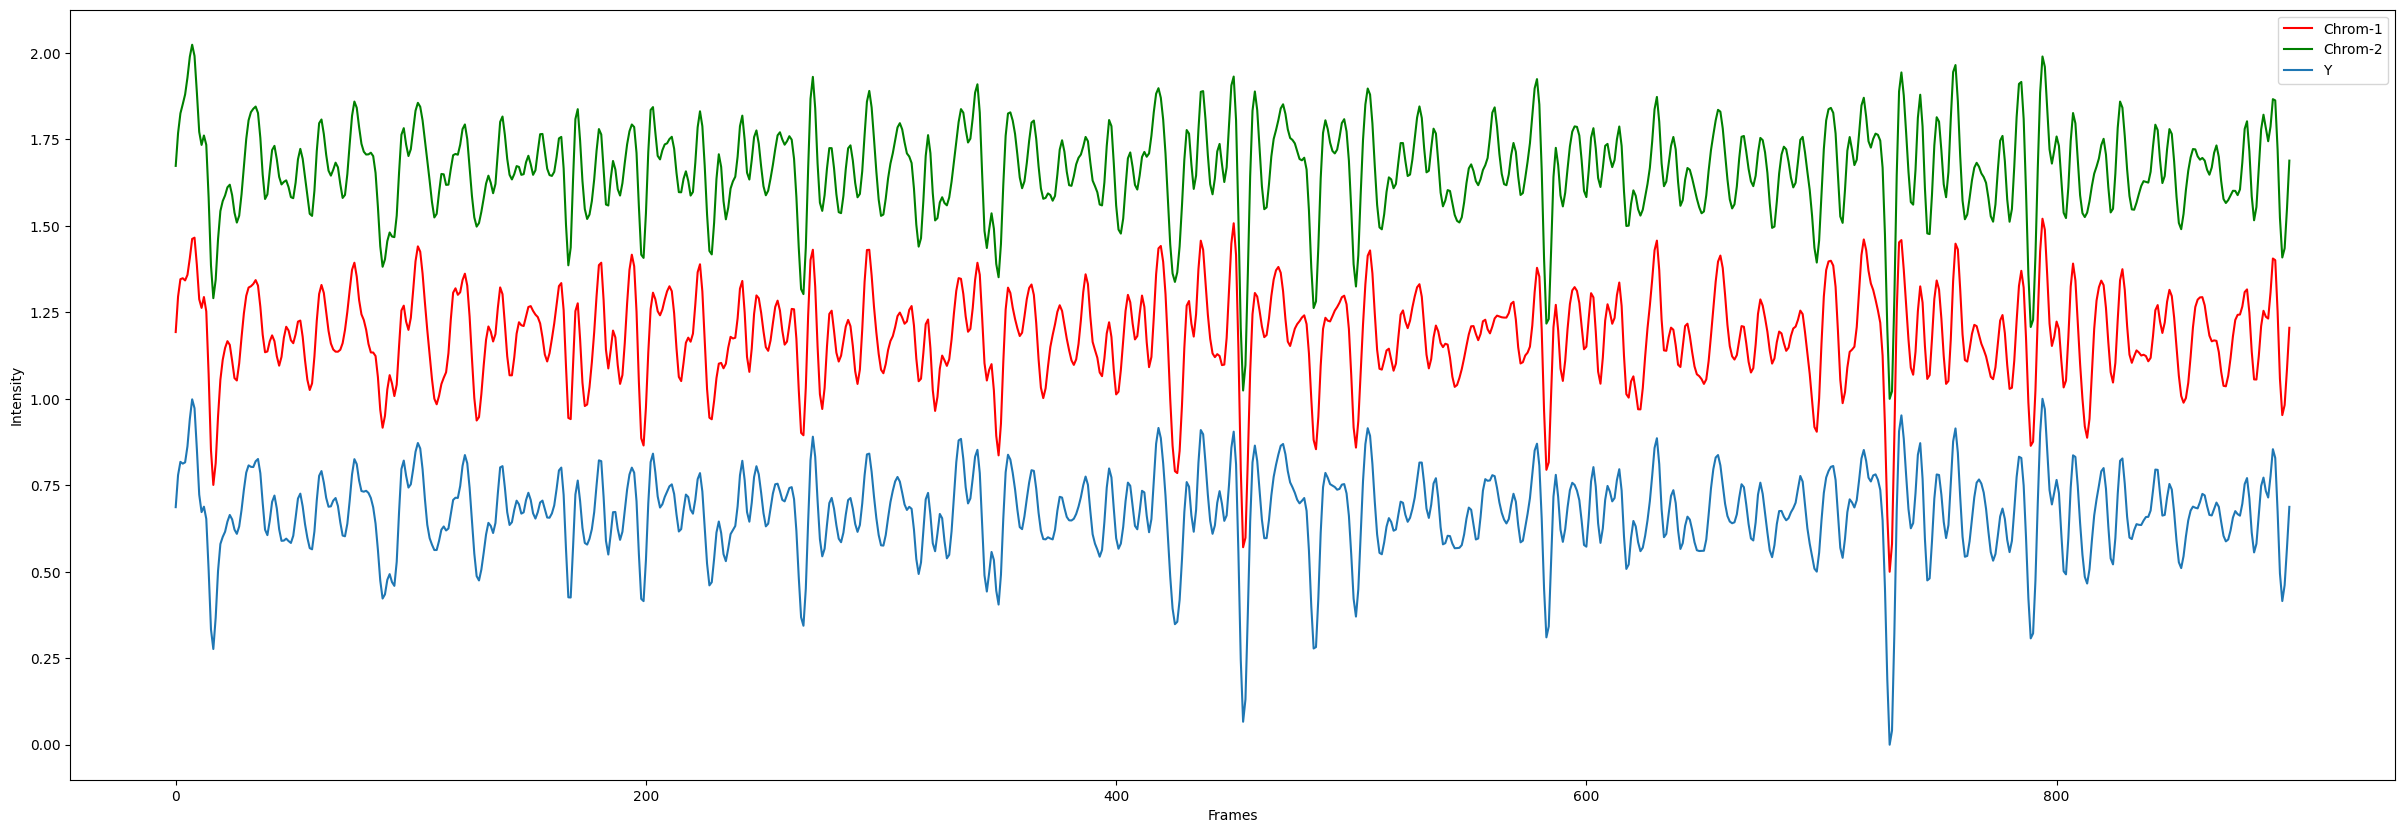

In [24]:
f1 = 3*r_norm - 2*g_norm
f2 = 1.5*r_norm + g_norm - 1.5*b_norm
track = normalize_1d_array(video.getTotalrPPGTrack())



plt.figure(figsize=(30, 10))

# plt.plot(f1, color='r')
# plt.plot(track[::2], color='g')

# diff = f1 - track[::2]
plt.plot(f1+0.5, color='r', label = "Chrom-1")
plt.plot(f2+1, color='g', label = "Chrom-2")
plt.plot(y_norm, label = "Y")
plt.legend()

plt.xlabel("Frames")
plt.ylabel("Intensity")
# plt.plot(track[::2])


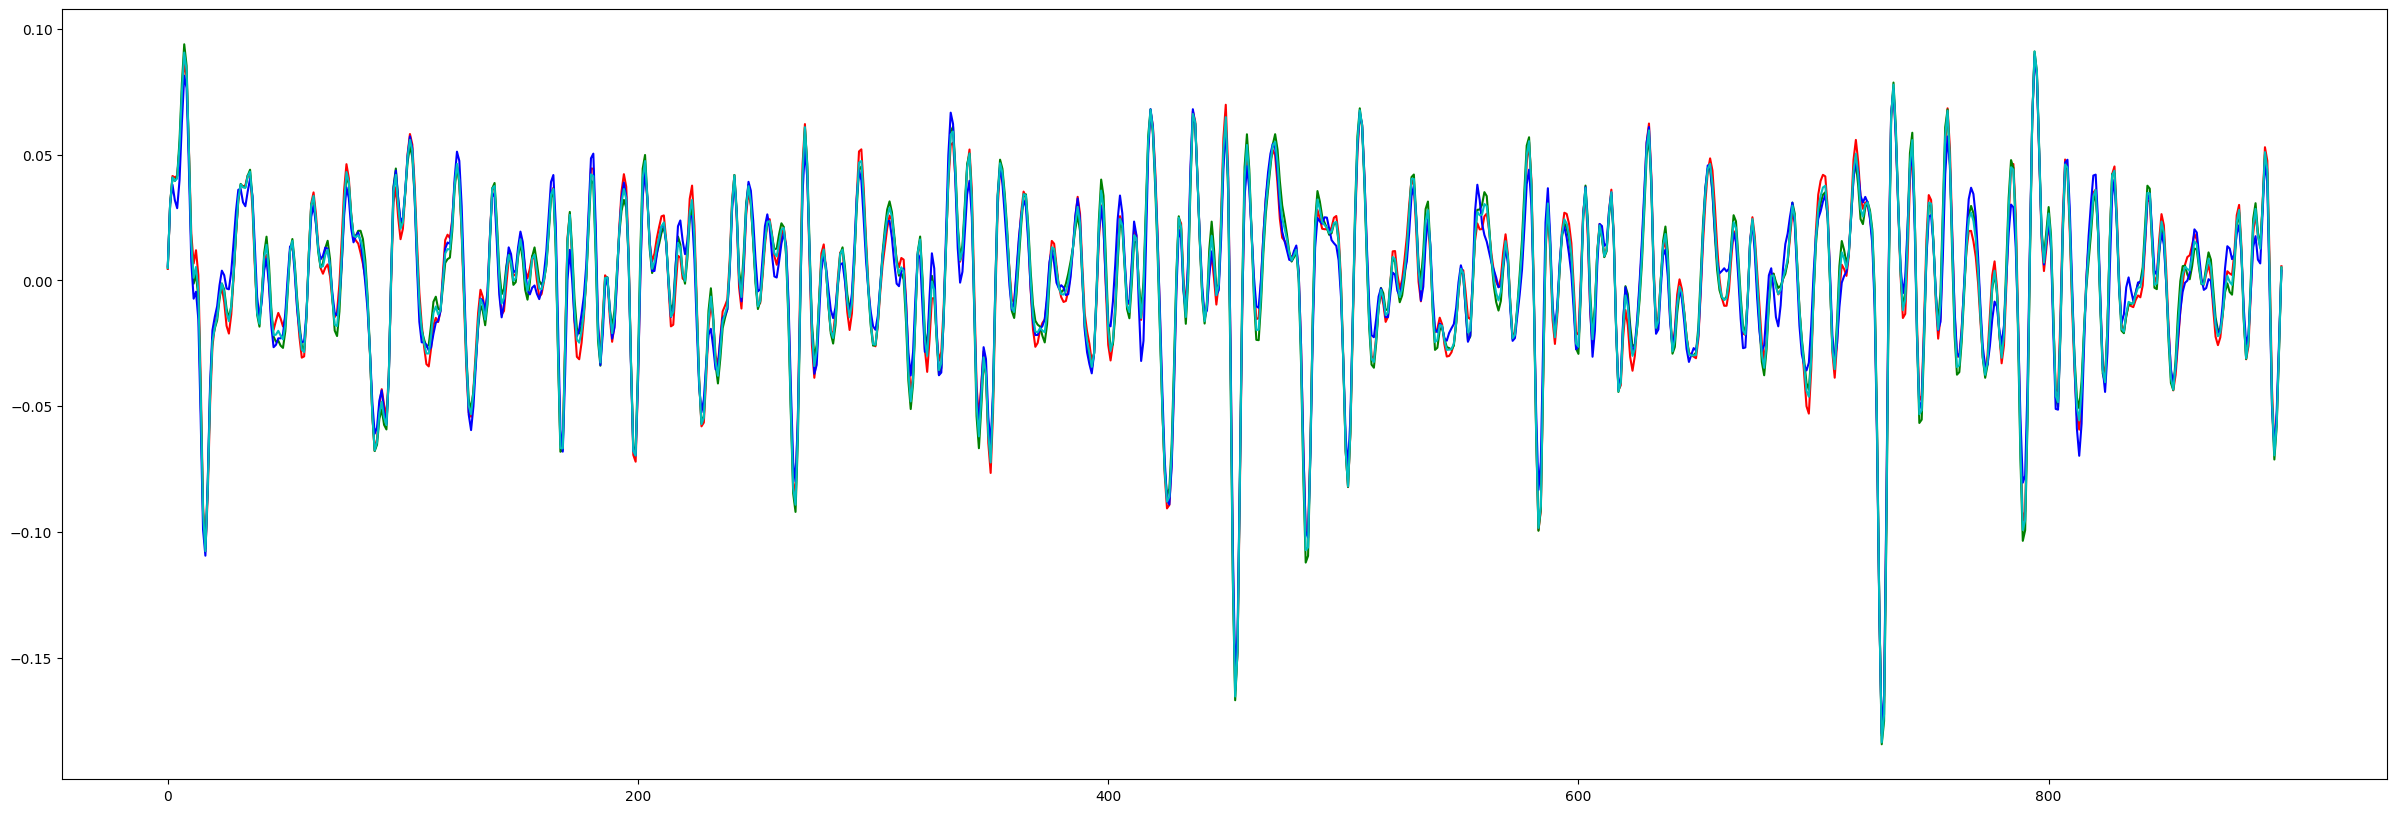

In [21]:
plt.figure(figsize=(30, 10))

plt.plot(r_bp, color = 'r')
plt.plot(g_bp, color = 'g')
plt.plot(b_bp, color = 'b')
plt.plot(y_bp, color = 'c')

In [ ]:
plt.figure(figsize=(30, 10))



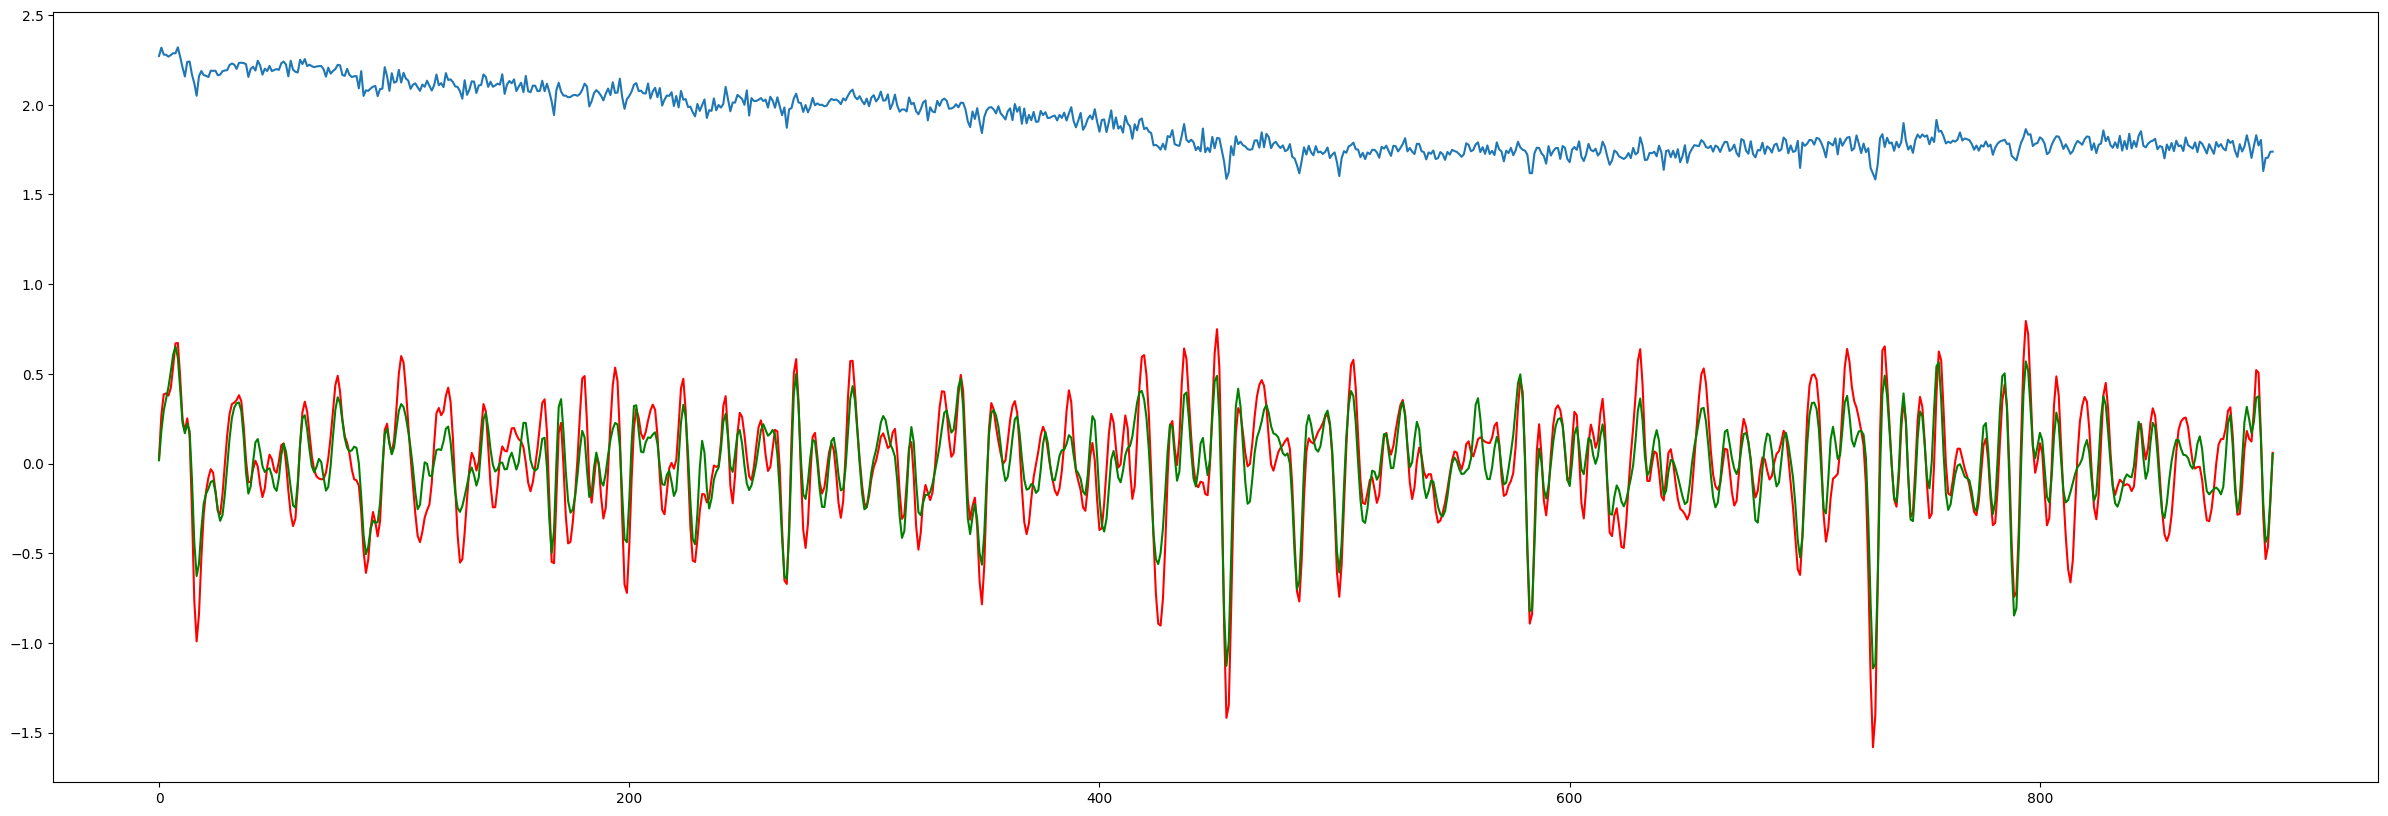

In [16]:
plt.figure(figsize=(30, 10))

plt.plot(chromData["f1"]*2000, color='r')
plt.plot(chromData["f2"]*2000, color='g')
plt.plot(y)

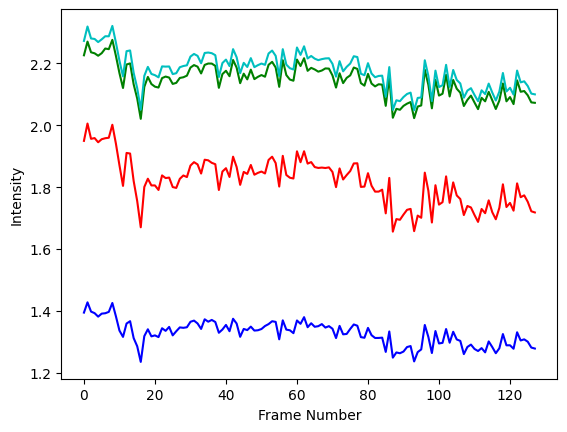

In [4]:
clrs = video.getColors(0)

plt.plot(clrs[0] - 0.75, color='r')
plt.plot(clrs[1], color='g')
plt.plot(clrs[2], color='b')
plt.plot(clrs[3], color='c')

plt.xlabel("Frame Number")
plt.ylabel("Intensity")

plt.show()

In [5]:
chrom = ChormFeatures(video)
chrom.buildCHROM()

feat = chrom.getFeatureImage()
cv2.imwrite("feat[0].png", feat[0][0])
cv2.imwrite("feat[1].png", feat[1][0])
cv2.imwrite("feat[2].png", feat[2][0])
cv2.imwrite("feat[3].png", feat[3][0])

True

In [6]:
chromObjs = {
   "Low" : [],
   "Medium" : [],
   "High" : []
} 

loc_root = "/content/drive/MyDrive/rPPG_Processed_Dataset/"

for i in range(len(videosLow)):
  print(f"processing video {videosLow[i]} {i+1}/{len(videosLow)}")

  video = VideoFeature(rootDir + videosLow[i], videosLow[i], roi.getROI, maxObjects=MAX_OBJECTS)
  video.readVideo() 

  chrom = ChormFeatures(video)
  chrom.buildCHROM()

  chromObjs['Low'].append(chrom)

  # -----

  print(f"processing video {videosMedium[i]} {i+1}/{len(videosMedium)}")

  video = VideoFeature(rootDir + videosMedium[i], videosMedium[i], roi.getROI, maxObjects=MAX_OBJECTS)
  video.readVideo() 

  chrom = ChormFeatures(video)
  chrom.buildCHROM()

  chromObjs['Medium'].append(chrom)

  # -----

  print(f"processing video {videosHigh[i]} {i+1}/{len(videosHigh)}")

  video = VideoFeature(rootDir + videosHigh[i], videosHigh[i], roi.getROI, maxObjects=MAX_OBJECTS)
  video.readVideo() 

  chrom = ChormFeatures(video)
  chrom.buildCHROM()

  chromObjs['High'].append(chrom)




100%|██████████| 900/900 [03:11<00:00,  4.70it/s]


processing video 9_1 35/35
1800
Reading video.. D:\D-Download\Pub_BH-rPPG_FULL\Pub_BH-rPPG_FULL\9_1\9_1


100%|██████████| 900/900 [03:05<00:00,  4.86it/s]


processing video 9_2 35/35
1800
Reading video.. D:\D-Download\Pub_BH-rPPG_FULL\Pub_BH-rPPG_FULL\9_2\9_2


100%|██████████| 900/900 [03:23<00:00,  4.42it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/rPPG_Processed_Dataset/chromObjs.pkl'

In [10]:
with open('D:\\D-Download\\Pub_BH-rPPG_FULL\\chromObjs(BhrPPG).pkl', 'wb') as file:
    pk.dump(chromObjs, file)